<a href="https://colab.research.google.com/github/allisonlinn/CSUREMM/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pandas
!pip install google-colab
!pip install sklearn
!pip install statsmodels

from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import grangercausalitytests

  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=fc8f0c0699b49cf8c6223a1de585e9d57bbb291c9288e52ce0f12cbe41c42c72
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [8]:
# Upload CSV file from local machine
uploaded = files.upload()

# Get the file name
file_name = next(iter(uploaded))

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_name)

Saving normalizedetrended.csv to normalizedetrended.csv


In [9]:
columns =    ["date", "compound_detrended", "compound",
              "VCDAX_V_detrended", "VCDAX_V_N", "VCSAX_V_detrended",
              "VCSAX_V_N", "VENAX_V_detrended", "VENAX_V_N",
              "VFAIX_V_detrended", "VFAIX_V_N", "VGSLX_V_detrended",
              "VGSLX_V_N", "VGHCX_V_detrended", "VGHCX_V_N",
              "VITAX_V_detrended", "VITAX_V_N", "VMAIX_V_detrended",
              "VSPVX_V_detrended", "VSPVX_V_N", "VTCAX_V_detrended",
              "VTCAX_V_N", "VUIAX_V_detrended", "VUIAX_V_N",
              "VINAX_V_detrended", "VINAX_V_N", "VUIAX_P_detrended",
              "VUIAX_P_N", "VGHCX_P_detrended", "VGHCX_P_N",
              "VFAIX_P_detrended", "VFAIX_P_N", "VSPVX_P_detrended",
              "VSPVX_P_N", "VITAX_P_detrended", "VITAX_P_N",
              "VMAIX_P_detrended", "VGSLX_P_detrended", "VGSLX_P_N",
              "VINAX_P_detrended", "VINAX_P_N", "VTCAX_P_detrended",
              "VTCAX_P_N", "VCSAX_P_detrended", "VCSAX_P_N",
              "VENAX_P_detrended", "VENAX_P_N", "VCDAX_P_detrended",
              "VCDAX_P_N" ]

columns_important_V = ["VCDAX_V_N", "VCSAX_V_N","VENAX_V_N", "VFAIX_V_N",
                       "VGSLX_V_N", "VGHCX_V_N", "VITAX_V_N", "VSPVX_V_N",
                      "VTCAX_V_N", "VUIAX_V_N", "VINAX_V_N"]
columns_important_P = ["VUIAX_P_N", "VGHCX_P_N", "VFAIX_P_N", "VSPVX_P_N",
                       "VITAX_P_N", "VGSLX_P_N","VINAX_P_N", "VTCAX_P_N",
                       "VCSAX_P_N", "VENAX_P_N", "VCDAX_P_N"]
columns_affected_all = columns_important_P + columns_important_V

data = df[columns].dropna()
data["date"] = pd.to_datetime(data["date"])
date = data.set_index('date', inplace = True)

data_affected = data[columns_affected_all]
data_detrended = pd.DataFrame(index=data_affected.index)

<ipython-input-10-219e9646819e>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1871.996
Date:                Thu, 13 Jul 2023   AIC                           3755.993
Time:                        18:59:32   BIC                           3790.118
Sample:                             0   HQIC                          3768.468
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7503      0.020    -37.300      0.000      -0.790      -0.711
ar.L2         -0.5825      0.025    -23.755      0.000      -0.631      -0.534
ar.L3         -0.4117      0.026    -15.684      0.0

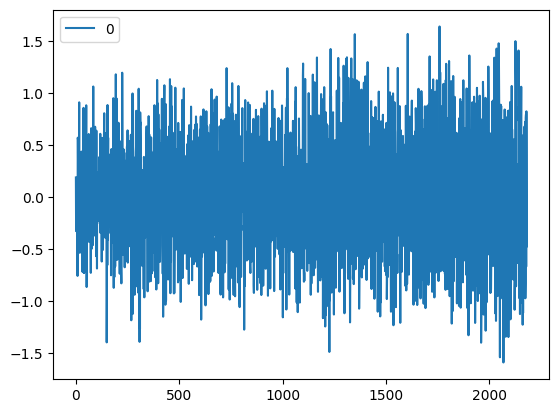

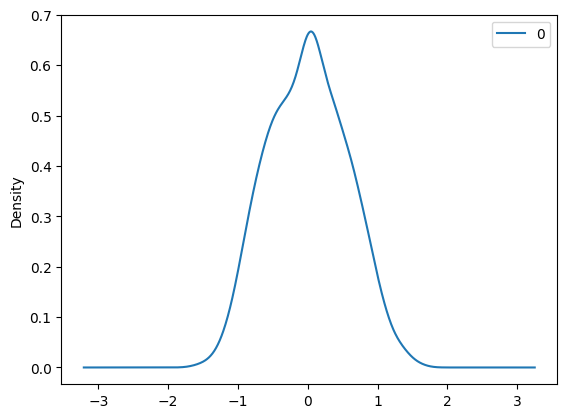

                 0
count  2182.000000
mean     -0.000325
std       0.570775
min      -1.592497
25%      -0.432780
50%       0.007327
75%       0.406170
max       1.636758


In [10]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = data['compound_detrended'].tolist()
# fit model
model = ARIMA(series, order=(5,1,0)) #why 5? might need to change play with these parameters;
#discrete series but interesting mathematically; one is the lag, one is the moving average; different numbers will give you different ARIMA
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<ipython-input-11-6faf3a6f14ff>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=-0.001503, expected=-0.531340
predicted=-0.098837, expected=0.648822
predicted=0.053654, expected=0.011085
predicted=-0.024943, expected=0.307147
predicted=0.189176, expected=-0.806391
predicted=-0.144872, expected=-0.739329
predicted=-0.253591, expected=-0.266866
predicted=-0.165799, expected=0.011396
predicted=-0.225828, expected=0.372658
predicted=-0.088110, expected=0.762120
predicted=-0.020956, expected=-0.370218
predicted=-0.086260, expected=-0.574255
predicted=-0.061296, expected=0.011707
predicted=-0.004939, expected=-0.141331
predicted=-0.018817, expected=0.285031
predicted=0.079764, expected=0.011894
predicted=-0.122464, expected=0.330156
predicted=0.018650, expected=0.037818
predicted=0.074904, expected=0.808480
predicted=0.283005, expected=0.037943
predicted=0.220704, expected=-0.868495
predicted=-0.019896, expected=-0.545133
predicted=-0.092293, expected=0.252929
predicted=-0.053846, expected=0.190291
predicted=0.033327, expected=0.214754
predicted=-0.040876, exp

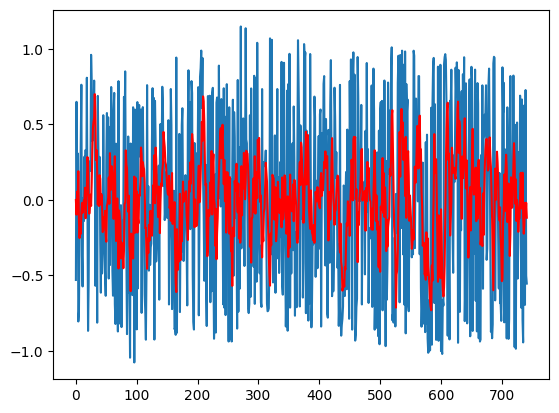

In [11]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = data['compound_detrended'].tolist()
# split into train and test sets
X = series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [12]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fit the ARIMA model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

# Get the coefficients of the AR and MA terms
ar_params = model_fit.arparams
ma_params = model_fit.maparams

# Get the constant term
const_param = model_fit.params[0]

# Print the equation
print(f"ARIMA Equation: y(t) = {const_param:.4f} + ", end="")
for i in range(len(ar_params)):
    print(f"({ar_params[i]:.4f} * y(t-{i+1})) + ", end="")
for i in range(len(ma_params)):
    print(f"({ma_params[i]:.4f} * e(t-{i+1})) + ", end="")
print("e(t)")

ARIMA Equation: y(t) = -0.7503 + (-0.7503 * y(t-1)) + (-0.5825 * y(t-2)) + (-0.4117 * y(t-3)) + (-0.2957 * y(t-4)) + (-0.1555 * y(t-5)) + e(t)


In [13]:
import numpy as np

# Assuming you have obtained the ARIMA equation coefficients
ar_coefs = [ar_params[i] for i in range(len(ar_params))]
ma_coefs = [ma_params[i] for i in range(len(ma_params))]

# Concatenate the AR and MA coefficients in reverse order
coefs = np.concatenate((ma_coefs[::-1], ar_coefs[::-1]))

# Determine the degree of the Taylor polynomial
degree = len(coefs) - 1

# Fit a polynomial to the coefficients using polyfit
poly_coefs = np.polyfit(range(degree + 1), coefs, degree)

# Print the Taylor polynomial coefficients
print("Taylor Polynomial Coefficients:")
for i, coef in enumerate(poly_coefs):
    print(f"Degree-{i} Coefficient: {coef:.4f}")

Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0057
Degree-1 Coefficient: -0.0473
Degree-2 Coefficient: 0.1141
Degree-3 Coefficient: -0.2128
Degree-4 Coefficient: -0.1555


<ipython-input-14-8a70c982f140>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2182
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1216.087
Date:                Thu, 13 Jul 2023   AIC                           2444.175
Time:                        19:07:09   BIC                           2478.300
Sample:                             0   HQIC                          2456.650
                               - 2182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1072      0.011     -9.891      0.000      -0.128      -0.086
ar.L2         -0.0740      0.011     -6.470      0.000      -0.096      -0.052
ar.L3          0.0234      0.012      1.992      0.0

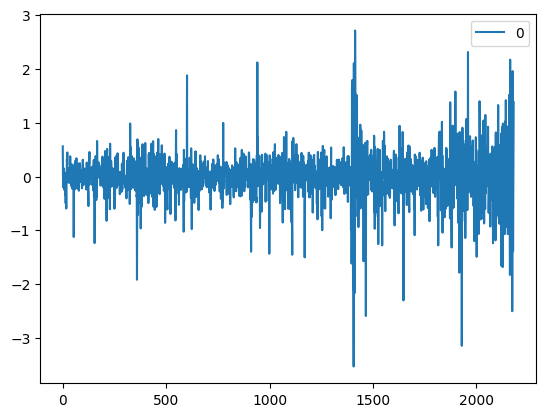

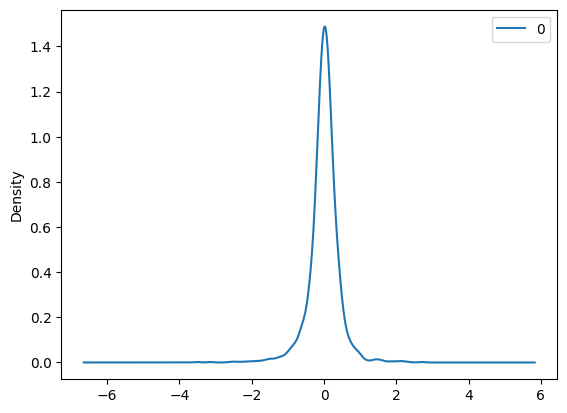

                 0
count  2182.000000
mean     -0.000198
std       0.422756
min      -3.526677
25%      -0.161423
50%       0.018127
75%       0.181475
max       2.711731


In [14]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
 return datetime.strptime('190'+x, '%Y-%m')
series = data['VCSAX_P_N'].tolist()
# fit model
model = ARIMA(series, order=(5,1,0)) #why 5? might need to change play with these parameters;
#discrete series but interesting mathematically; one is the lag, one is the moving average; different numbers will give you different ARIMA
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

<ipython-input-15-4a9cd11ee871>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


predicted=0.017562, expected=-0.633279
predicted=-0.696514, expected=-0.237400
predicted=-0.097363, expected=-0.611958
predicted=-0.715765, expected=-0.504993
predicted=-0.466888, expected=0.407890
predicted=0.381553, expected=0.580747
predicted=0.510942, expected=0.667437
predicted=0.724039, expected=0.901119
predicted=0.866586, expected=0.967534
predicted=0.912798, expected=1.054225
predicted=1.054757, expected=0.841864
predicted=0.827672, expected=1.435420
predicted=1.445788, expected=1.871849
predicted=1.802780, expected=1.466878
predicted=1.476591, expected=1.289998
predicted=1.339747, expected=-0.255422
predicted=-0.306554, expected=0.226624
predicted=0.339534, expected=0.815112
predicted=0.696378, expected=0.724399
predicted=0.774579, expected=0.892188
predicted=0.966575, expected=0.264196
predicted=0.207567, expected=-0.399276
predicted=-0.347155, expected=-0.130114
predicted=-0.117188, expected=-0.905097
predicted=-0.942817, expected=-0.194961
predicted=-0.069162, expected=0.0

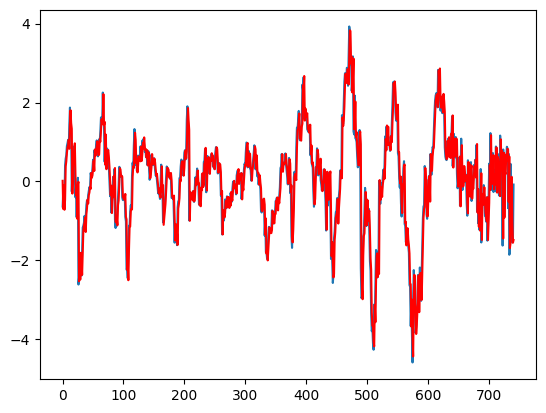

In [15]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = data['VCSAX_P_N'].tolist()
# split into train and test sets
X = series
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming you have already fit the ARIMA model
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit()

# Get the coefficients of the AR and MA terms
ar_params = model_fit.arparams
ma_params = model_fit.maparams

# Get the constant term
const_param = model_fit.params[0]

# Print the equation
print(f"ARIMA Equation: y(t) = {const_param:.4f} + ", end="")
for i in range(len(ar_params)):
    print(f"({ar_params[i]:.4f} * y(t-{i+1})) + ", end="")
for i in range(len(ma_params)):
    print(f"({ma_params[i]:.4f} * e(t-{i+1})) + ", end="")
print("e(t)")

ARIMA Equation: y(t) = -0.1072 + (-0.1072 * y(t-1)) + (-0.0740 * y(t-2)) + (0.0234 * y(t-3)) + (-0.0542 * y(t-4)) + (-0.0029 * y(t-5)) + e(t)


In [17]:
import numpy as np

# Assuming you have obtained the ARIMA equation coefficients
ar_coefs = [ar_params[i] for i in range(len(ar_params))]
ma_coefs = [ma_params[i] for i in range(len(ma_params))]

# Concatenate the AR and MA coefficients in reverse order
coefs = np.concatenate((ma_coefs[::-1], ar_coefs[::-1]))

# Determine the degree of the Taylor polynomial
degree = len(coefs) - 1

# Fit a polynomial to the coefficients using polyfit
poly_coefs = np.polyfit(range(degree + 1), coefs, degree)

# Print the Taylor polynomial coefficients
print("Taylor Polynomial Coefficients:")
for i, coef in enumerate(poly_coefs):
    print(f"Degree-{i} Coefficient: {coef:.4f}")

Taylor Polynomial Coefficients:
Degree-0 Coefficient: 0.0226
Degree-1 Coefficient: -0.1863
Degree-2 Coefficient: 0.4651
Degree-3 Coefficient: -0.3526
Degree-4 Coefficient: -0.0029
